## Introduction

In this activity we will use python and some of the built in functions to approximate the conductivity of a single fracture using the cubic law and then demonstrate how this is integrated into a reduced physics models to represent a more complex fracture network with variable apertures.

We need to import a few useful packages for working with vectors (numpy), for plotting (matplotlib.pyplot and matplotlib.tri), for performing linear algebra (scipy linalg), and lastly a useful tool for calculating distances (scikit-learn euclidean distances). Scikit-learn should be automatically installed with Anaconda, but can be easily added if not. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri
from scipy import linalg as LA
from scipy.special import erfc as erfc

## Cubic law function definition

Now let's define a function that calculates the cubic law For a single fracture.

In [2]:
def cubicLaw(mu, b, dP, l):
    #b is the aperture [m]
    #mu is the dynamic fluid viscosity [Pa/m]
    #dP is the change in pressure from inlet to outlet  [Pa]
    #l is the length of the fracture [m]
    Q = (b**3/(12*mu))*(dP/l) #volumetric flow rate
    return Q

From the assumptions we make for the Cubic law (e.g. laminar flow) we can relate the Cubic law to Darcy's law to derive an equation that relates fracture permeability with fracture width. Refer to the lecture notes for the derivation.

In [3]:
def fracPerm(b):
    #b is the aperture [m]
    k = b**2/12 #[m^2]
    return k

We can now plot the affect that aperture size has on fracture permeability.

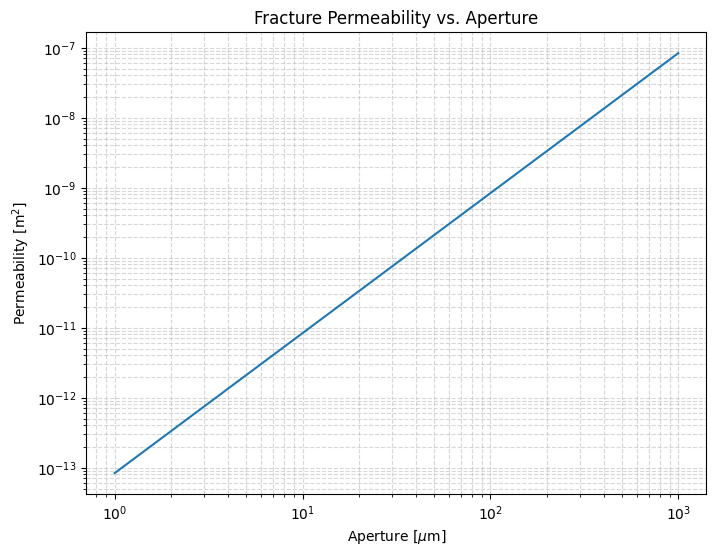

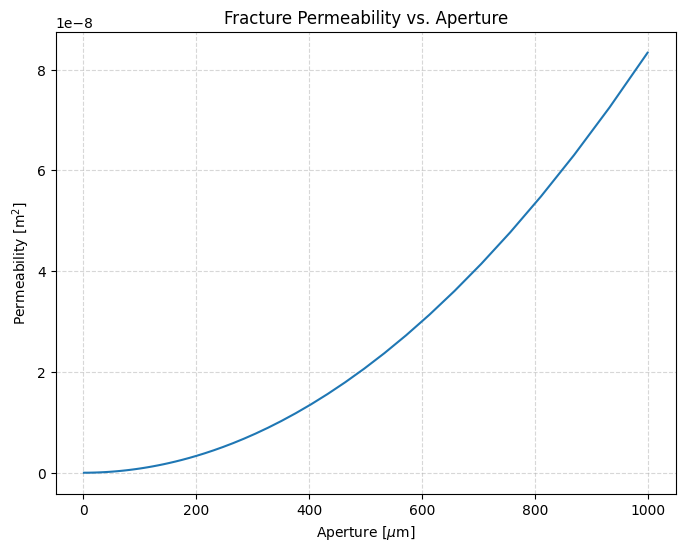

In [4]:
# Define a range of fracture aperture values [m]
apertures = np.logspace(-6, -3, 100) # apertures from 1e-5 [m] (100 um) to 1e-2 [m] (1 cm)

# Compute fracture permeability for each aperture
permeabilities = fracPerm(apertures)

# Plot the results in log space
plt.figure(figsize=(8, 6))
plt.loglog(apertures*1e6, permeabilities)
plt.xlabel("Aperture [$\mu$m]")
plt.ylabel("Permeability [m$^2$]")
plt.title("Fracture Permeability vs. Aperture")
plt.grid(True, which="both", ls="--", alpha=0.5)
plt.show()

# Plot the results in linear space
plt.figure(figsize=(8, 6))
plt.plot(apertures*1e6, permeabilities)
# plt.ylim([10E-11,1E-5])
plt.xlabel("Aperture [$\mu$m]")
plt.ylabel("Permeability [m$^2$]")
plt.title("Fracture Permeability vs. Aperture")
plt.grid(True, which="both", ls="--", alpha=0.5)
plt.show()

As a refresher, convert the last plot to hydraulic conductivity as a function of aperture.

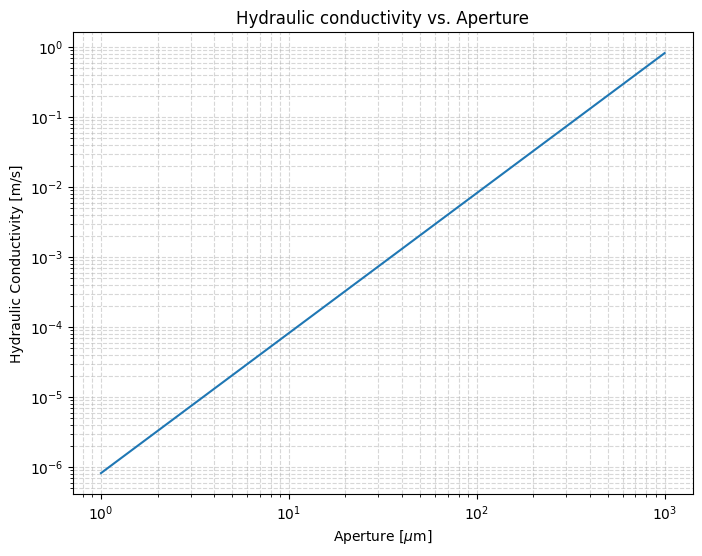

In [5]:
#Define the viscosity of the fluid
mu = 1.0e-3 # Viscosity (approx. water at ~20°C) [Pa·s]
# density
rho = 1000 # kg/m^3
# gravity
g = 9.81

# calculate hydraulic conductivity
hk = permeabilities*rho*g/mu

# Plot the results in linear space
plt.figure(figsize=(8, 6))
plt.loglog(apertures*1e6, hk)
plt.xlabel("Aperture [$\mu$m]")
plt.ylabel("Hydraulic Conductivity [m/s]")
plt.title("Hydraulic conductivity vs. Aperture")
plt.grid(True, which="both", ls="--", alpha=0.5)
plt.show()

How does this permeability range compare with some common [geologic materials](https://en.wikipedia.org/wiki/Hydraulic_conductivity#/media/File:Groundwater_Freeze_and_Cherry_1979_Table_2-2.png)?


Finally fracture trasmissivity (T) is analogous to the idea in standard Darcy flow that transmissivity = hydraulic conductivity multiplied by layer thickness. So, replace layer thickness with aperture (b) and you get `T = b * HK`.

In [6]:
def fracT(b, rho, g, mu):
    #b is the aperture [m]
    #rho is density [kg/m^3]
    #g is gravity [m/s^2]
    #mu is the dynamic fluid viscosity [Pa/m]
    T = b * (b**2 * rho * g ) / (12 * mu) #this is b * hk from the previous code section [m^2/s]
    # Return the transmissivity (T) from this function
    return T

You'll notice the addition of mu in the above function. This means that we've introduced fluid terms. So transmissivity is a fluid property whereas permeability is a rock (or fracture) property.

Now let's set up the input parameters and plot how transmissivity is affected by aperture changes.

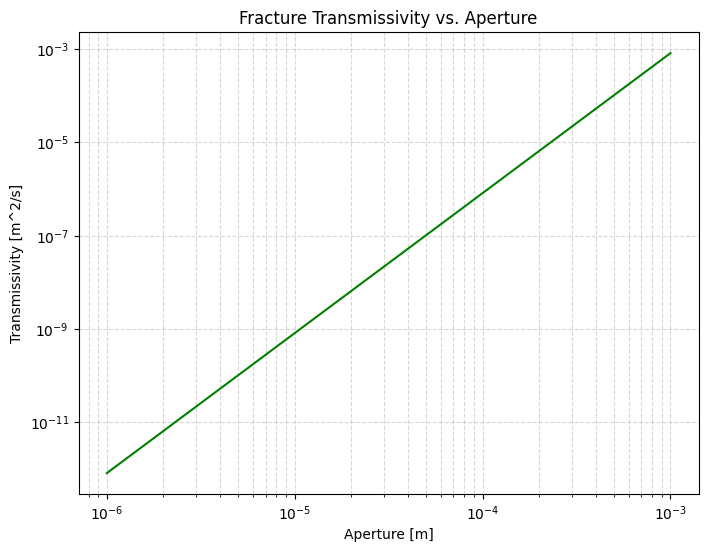

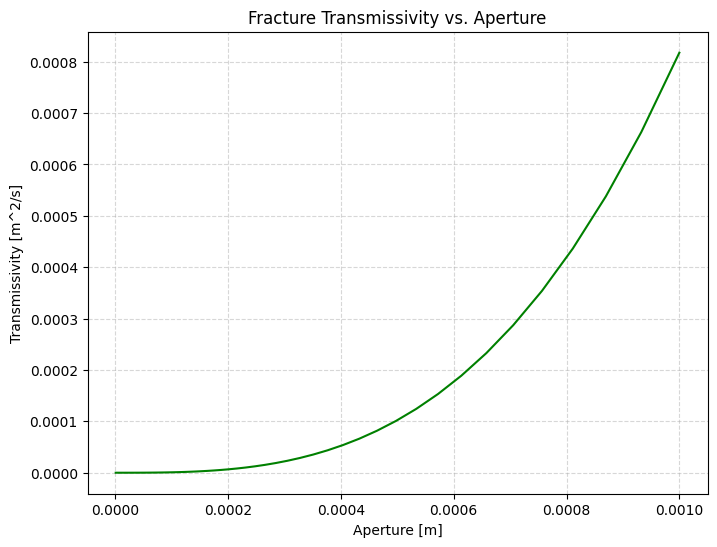

In [7]:
#Define the viscosity of the fluid
mu = 1.0e-3 # Viscosity (approx. water at ~20°C) [Pa·s]

#Compute fracture transmissivity for each aperture
T_values = fracT(apertures, rho, g, mu) # [m^2/s]

# set up plot in log space
plt.figure(figsize=(8, 6))
plt.loglog(apertures, T_values, 'g-')
plt.xlabel("Aperture [m]")
plt.ylabel("Transmissivity [m^2/s]")
plt.title("Fracture Transmissivity vs. Aperture")
plt.grid(True, which="both", ls="--", alpha=0.5)
plt.show()

# set up plot in linear space
plt.figure(figsize=(8, 6))
plt.plot(apertures, T_values, 'g-')
plt.xlabel("Aperture [m]")
plt.ylabel("Transmissivity [m^2/s]")
plt.title("Fracture Transmissivity vs. Aperture")
plt.grid(True, which="both", ls="--", alpha=0.5)
plt.show()

From here, you may notice that the Cubic law is T * delta P. The dependence of T on b**3 is where the Cubic law gets it's name.

The Cubic law uses a pressure gradient rather than a head gradient which is why you'll notice rho and g are absent.

Now, use the Cubic law function we set up at the beginning to make a plot showing how volumetrix flux is related to aperture.

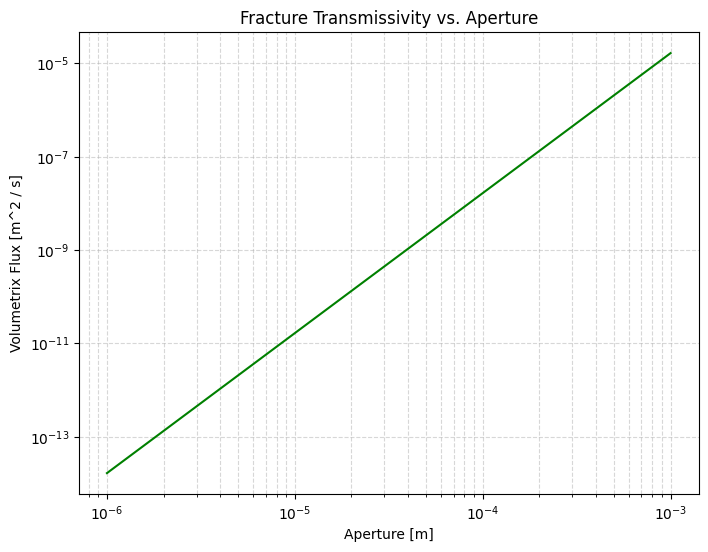

In [8]:
# Recall the Cubic law formula
# We've already initiated aperture sizes and mu
# So we only need a fracture length (l) and the pressure drop from inlet to outlet (dP)

dP = 20 # Pa
l = 0.1 # m 

Q_values = cubicLaw(mu, apertures, dP, l)

# set up plot in log space
plt.figure(figsize=(8, 6))
plt.loglog(apertures, Q_values, 'g-')
plt.xlabel("Aperture [m]")
plt.ylabel("Volumetrix Flux [m^2 / s]")
plt.title("Fracture Transmissivity vs. Aperture")
plt.grid(True, which="both", ls="--", alpha=0.5)
plt.show()

## Activity:

Adapt the code above to see how volumetric flux `Q` varies with pressure drop `dP`


In [9]:
# #Make a new array for P using linspace
# P_values = 

# #Set a realistic aperture value
# aperture = 

# #Call the Cubic law function with your new variables
# Q_values_new = 

# #plot

## Bonus Activity:
Now let's use our new fracture modeling skills to model the flow in a simple fracture network which more than one fracture.

In [16]:
###This function is for model setup and should be ignored
def r_fun(mu, dx, dy, bi, bj):
    r = (6*mu*(dx/dy)*((1/bi**3)+(1/bj**3)))
    return r

def graphFlowModel(core_width, inlet_loc, outlet_loc, dy, mu, flowrate, x, y, z, aperature, n, k):
    inlet = np.array([core_width/2,core_width/2, inlet_loc])
    # outlet1 = np.array([max(x)/2,max(y)/2, outlet_loc])
    outlet2 = np.array([core_width,core_width, outlet_loc])
    outlet3 = np.array([0,0, outlet_loc])
    points = np.column_stack((x,y,z))
    ##add inlet and outlet conditions
    ## must add the appropriate number of outlets and inlets to points and aperature arrays
    # points = np.append(points, [inlet,outlet1, outlet2, outlet3],axis = 0)
    points = np.append(points, [inlet, outlet2, outlet3],axis = 0)
    # clusterID = np.append(clusterID, [-1,-1], axis = 0)
    # aperature = np.append(aperature, [0.79375/1000,0.79375/1000, 0.79375/1000], axis = 0) #this is 1/32" ID tubing in mm
    aperature = np.append(aperature, [0.000574266350361401,0.000574266350361401, 0.000574266350361401], axis = 0) #
    # aperature = aperature * .15

    # Perform node sorting, pairwise distance computation, and self-distance masking
    pointsSorted = sorted(points , key=lambda k: [k[2], k[0]]) #this sorts the points from low x to greatest x
    pointsSorted = np.array(pointsSorted)
    distances = np.sqrt(((pointsSorted[:, None, :] - pointsSorted[None, :, :]) ** 2).sum(axis=2))
    # set distances of zero equal to very big number. This makes it so that you aren't connecting a point to itself
    distances[distances==0]=1e26

    ###Set boundary conditions for known pressure and flowrate###
    #How many inlets do you have?
    inlets = 1 #this is for one inlet (like a core)
    n = n + inlets
        
    #How many outlets do you have?
    outlets = 2 # this is for 2 outlets

    #How many known pressures do you have?
    numBounds = 2 #One known pressure - the outlet
    n = n + numBounds

    #set outlet pressures if different pressures
    outlet_pressures = np.asarray((101325,101325))

    #This is an example of using multiple known pressure nodes
    outlet_ind = np.argwhere(pointsSorted[:,2]== np.max(pointsSorted[:,2]))

    outletArray = np.zeros((outlets,2))
    for i in range(outlets):
        outletArray[i,0] = outlet_ind[i][0]
        outletArray[i,1] = outlet_pressures[i]
    #How many known pressures do you have?

    ##make the adjacency matrix 
    k = k #number of distances to extract
    edges = np.zeros((n,k), dtype=int)
    # preallocate adjacency matrix
    A = np.zeros((n,n))
    # preallocate flow connection matrix
    Q = np.zeros((n,n))
    b = np.zeros((n,1))
    PV = np.zeros((n,n))
    V = np.zeros((n,n))

    # preallocate edges dictionary
    edges = {}
    #This statement takes the index of the smallest k number of values from each row 
    #Read as shortest 4 distances from a node to other nodes (one of the 4 is itself)
    #Makes weighted adjacency matrix          
    for i in range(n):
        if i!= 0 and i <3:
            ind = np.argpartition(distances[i,:], 4)[:4] #this is grabbing the shortest 4 distances from a node to other nodes (one of the 4 is itself)
            ind = ind[1:]
        else:
            ind = np.argpartition(distances[i,:], k)[:k] # find the indices of the k smallest distances.

        aval = 1/(r_fun(mu, distances[i,ind], dy, aperature[i], aperature[ind]))
        A[i,ind] = aval
        A[ind, i]= aval
        edges[i] =  ind.astype(int)

    # Check to makes sure all edge connections are mutual
    for i in range(n):    
        for j in edges[i]:
            if i not in edges[j]:
                edges[j] = np.append(edges[j], i)
                print('Edge: ' + str(j) + ' to '+ str(i) + ' added')

    ###had to add this after making connections mutual or it wouldnt work properly    
    for i in range(n):    
        for j in edges[i]:
            PV[i,j] = distances[i,j]*((aperature[i]+aperature[j])/2) *dy # [m^3]

    #Make diagonal matrix [D] from adjacency matrix [A]
    d_center = np.sum(A, axis=1)
    D = np.diag(d_center)

    #create Laplacian matrix [L]
    L = D-A

    #sort so that early known nodes are handled first  
    mSorted = outletArray[outletArray[:,0].argsort()]
    mSortedLoop = mSorted #this changes the index of the node to account for deleting rows of L matrix
    #add pressure boundary conditions to b vector
    for i in range(numBounds):
        for j in edges[mSorted[i,0]]:
            b[j] = b[j] + mSorted[i,1] * A[np.int64(mSorted[i,0]),j] #set the b matrix to known pressure / R at node and connections
            #should this be negative????

    #remove known pressure nodes from the graph matrix and b vector
    # Get sorted indices of boundary pressure nodes
    indices_to_remove = np.int64(mSortedLoop[:, 0])
    
    # Use advanced indexing to delete rows and columns efficiently
    L = np.delete(L, indices_to_remove, axis=0)  # Remove rows
    L = np.delete(L, indices_to_remove, axis=1)  # Remove columns
    b = np.delete(b, indices_to_remove, axis=0)  # Remove corresponding rows from b

    ##find inlet index if using flow-through experiment
    inlet_ind = np.argwhere(pointsSorted[:,2] == np.min(pointsSorted[:,2]))[0, 0]

    b[inlet_ind] = flowrate 

    ##solve for unknown pressure heads
    h = LA.solve(L,b)

    check = L@h - b
    print('Residual numerical error: %e' %np.sum(check))

    #add known pressures back into h vector
    for i in range(len(outletArray)):
        h = np.insert(h, np.int64(outletArray[i,0]), outletArray[i,1])

    # Calculate flow through each edge using large peclet number          
    for node_i, js in edges.items():
        for node_j in js:
            # calculate pressure drop
            dp = h[node_i] - h[node_j]
            # calculate flow
            Q[node_i, node_j] = dp/r_fun(mu, distances[node_i, node_j], dy, aperature[node_i], aperature[node_j])
            # Divide flow by cross-sectional area to calculate velocity between nodes
            V[node_i, node_j] = Q[node_i, node_j]/(dy*(aperature[node_i]+ aperature[node_j])/2)
                        
    return aperature, n, V, h, Q, pointsSorted, inlet_ind, outlet_ind

Okay... That's quite a block of code, but everything you need and can adjust is below.

Edge: 4 to 1 added
Edge: 3 to 2 added
Edge: 3 to 5 added
Edge: 4 to 5 added
Edge: 4 to 6 added
Edge: 3 to 6 added
Residual numerical error: 4.132594e-20


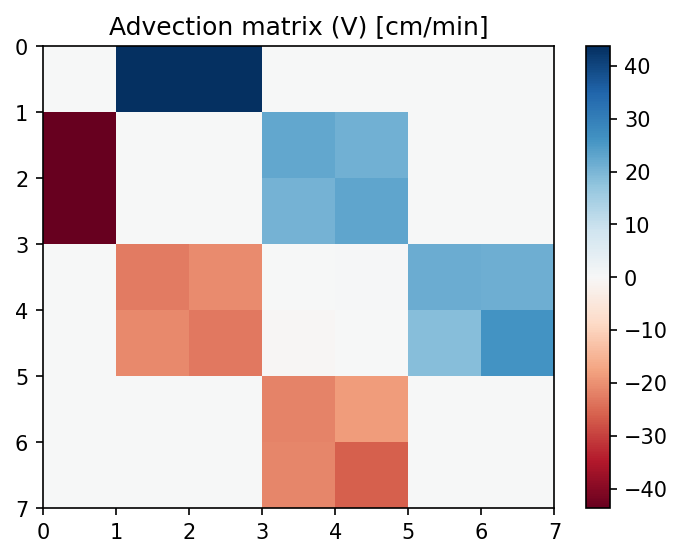

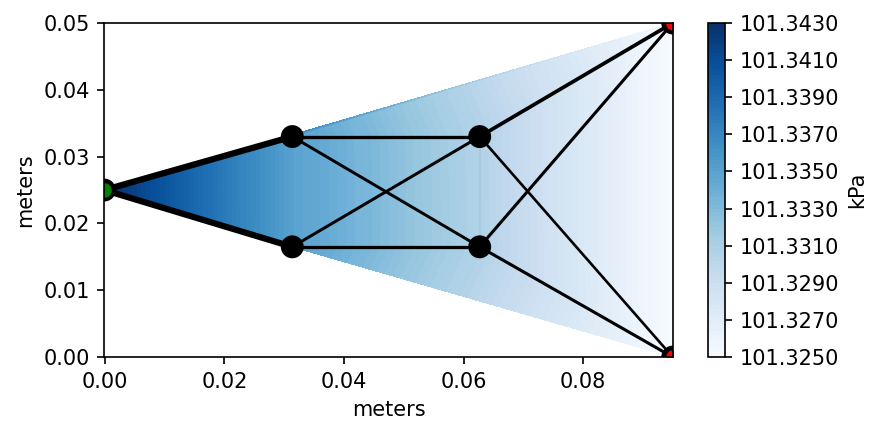

In [17]:
#user defined variables for a 2-inch diameter fractured core that is 4 inches long.
core_width = 0.05 #[m] - 5cm
inlet_loc = -0.0001 #[m]
outlet_loc = 0.095 # set to length of core [m]

#dy is the fracture channel width
dy= 0.001 #[m]
mu = 8.9E-4 #[Pa*s]

flowrate = 8.34E-9 # flowrate into the inlet [m^3/s] - 8.34E-9 m^3/s = 0.5 mL/min

##make graph with 4 nodes in middle
x = np.array([core_width*.33,core_width*.33,core_width*.66,core_width*.66]) #x is different so that plot shows nicely for graph
y = np.array([core_width*.33,core_width*.66,core_width*.33,core_width*.66])
z = np.array([outlet_loc*.33,outlet_loc*.66,outlet_loc*.33, outlet_loc*.66])
aperature = np.array([0.000574266350361401,0.000574266350361401,0.000574266350361401,0.000574266350361401]) #[m]
n = 4 #How many nodes are there
k = 2 #How many nearest neighbors to make connections with

aperature, n, V, h, Q, pointsSorted, inlet_ind, outlet_ind = graphFlowModel(core_width, inlet_loc, outlet_loc, dy, mu, flowrate, x, y, z, aperature, n, k)

# Plot V matrix
plt.figure(figsize=(5.5,4),dpi=150)    
plt.pcolor(V*60*100, cmap='RdBu')
plt.gca().invert_yaxis()
plt.colorbar()
plt.title('Advection matrix (V) [cm/min]')
plt.show()

# plot the graph
plt.figure(figsize=(6,3),dpi=150)
# interpolate pressure field
triang = tri.Triangulation(pointsSorted[:,2], pointsSorted[:,0])
# z_cont = np.linspace(62, 69)
cf = plt.tricontourf(pointsSorted[:,2], pointsSorted[:,0], np.squeeze(h/1000), 100, cmap="Blues")
# plt.colorbar( label='kPa')
plt.colorbar(cf, format='%.4f', label='kPa')
# plt.clim([60, 80])

# plot connections
qmax = np.max(Q)
# loop through rows of the Q matrix
for i in range(n):
    for j in range(i, n, 1):
        if abs(Q[i,j]) > 0:
            plt.plot([pointsSorted[i,2], pointsSorted[j,2]], [pointsSorted[i,0], pointsSorted[j,0]], color='k', linewidth = 3*abs(Q[i,j])/qmax)

# Plot points based on aperature size
amax = np.max(aperature)
plt.scatter(pointsSorted[:,2], pointsSorted[:,0], s=aperature/amax*100, c='k')

# inlet point
plt.plot(pointsSorted[inlet_ind,2], pointsSorted[inlet_ind,0], 'og')
# plot outlet point
plt.plot( pointsSorted[outlet_ind,2], pointsSorted[outlet_ind,0], 'or')

# plt.title('Interpolated pressure field along graph (%d nodes)' % n)
plt.xlabel('meters')
plt.ylabel('meters')
plt.tight_layout()
plt.show()

The inlet node is green and the two red nodes are outlets. Width of the lines represent the flux through a fracture.

Try changing parameters to see how the advection matrix and pressure drop changes. Flowrate, dy, and aperture are the simplest to alter!